<a href="https://colab.research.google.com/github/kmongsil1105/colab_ipynb/blob/main/8%EC%B0%A8%EC%8B%9C_Speech_Recognition_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI 텐서플로우 맛보기 특강
# 8차시: 텐서플로우 2.x 활용
# Speech Recognition 기초
### 2020. 08. 25. 20:00 ~ 22:00


# 8주차: Speech Recognition

# 1. 도구 불러오기 및 버전 확인


In [ ]:
!pip -q install tensorflow_io

     |████████████████████████████████| 22.3MB 134kB/s 


# 도구 준비
 * import
⇒ 표준 라이브러리, 텐서플로우 등 불러오기
 * tensorflow_io
⇒ 오디오 데이터 다루는데에 필요
 * sklearn
⇒ 학습 / 검증 데이터셋 분할에 활용
 * IPython.display Audio
⇒ 노트북에서 오디오들을 때 활용

In [ ]:
import os
import random
import math

import tensorflow as tf # 텐서플로우
import tensorflow_io as tfio
import matplotlib.pyplot as plt # 시각화 도구
%matplotlib inline
import numpy as np
from sklearn.model_selection import train_test_split

from IPython.display import Audio


print(f'Tensorflow 버전을 확인합니다: {tf.__version__}')


Tensorflow 버전을 확인합니다: 2.3.0


# 2. 학습 데이터 다운로드

# 구글 Speech Recognition 데이터
 * 10만개 이상의 .wav 데이터
 * 초기 10개 ⇒ 현재 35개
"Bed", "Bird", "Cat", "Dog", "Happy", "House", "Marvin", "Sheila", "Tree", "Wow"
 * https://storage.cloud.google.com/download.tensorflow.org/data/speech_commands_v0.02.tar.gz

# 구글 드라이브에 데이터 업로드!
 * Colab Notebooks 안에 data_speech_commands_v0.02.tar.gz 업로드

# Load Data From Google Drive
 * 코드 실행하면 나오는 URL로 접속
 

In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/gdrive')
except:
    print(f'Google colab 환경이 아닙니다.')
    pass


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# 업로드 데이터 압축 해제

In [ ]:
!rm -r /tmp/data_speech_commands &> /dev/null
!mkdir /tmp/data_speech_commands
!tar --directory /tmp/data_speech_commands -xvf '/content/gdrive/My Drive/Colab Notebooks/data_speech_commands_v0.02.tar.gz' &> /dev/null
!rm -r /tmp/data_speech_commands/_background_noise_
!ls /tmp/data_speech_commands


backward  five	   learn    on	       stop		    visual
bed	  follow   left     one        testing_list.txt     wow
bird	  forward  LICENSE  README.md  three		    yes
cat	  four	   marvin   right      tree		    zero
dog	  go	   nine     seven      two
down	  happy    no	    sheila     up
eight	  house    off	    six        validation_list.txt


# 데이터 불러오기 :: 파일에 대한 경로만 저장되어 있음!!
 * 10만개 이상의 .wav 데이터와 label
 * 레이블은 35종류

In [ ]:
path_root = '/tmp/data_speech_commands'

files = list()
labels = list()
lab2idx = list()
for l1 in os.scandir(path_root):
    if l1.is_file():
        continue
    label = os.path.basename(l1.path)
    if label not in lab2idx:
        lab2idx.append(label)
    label_idx = lab2idx.index(label)
    for l2 in os.scandir(l1.path):
        files.append(l2.path)
        labels.append([label_idx])
dataset_root = (files, labels)
print(f'데이터 불러오기 완료: 파일 경로 {len(files)}개, 레이블 {len(lab2idx)}개')


데이터 불러오기 완료: 파일 경로 105829개, 레이블 35개


# 데이터 분할

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(files, labels, test_size=0.2, shuffle=True)


# 3. 학습 데이터 살펴보기

In [ ]:
audio = tfio.audio.AudioIOTensor(x_test[0])  # 텐서플로우 IO 로 불러오고
print(audio)
audio_tensor = tf.squeeze(audio.to_tensor(), axis=-1)  # 오디오 파일을 텐서플로우 형식으로 변환
print(audio_tensor)

# wav파일 1개안에 16,000개의 숫자가 저장되어 있다. (16,000개짜리 데이터 셋)
# rate ??

<AudioIOTensor: shape=[16000     1], dtype=<dtype: 'int16'>, rate=16000>
tf.Tensor([-531 -729 -640 ... -966 -858 -913], shape=(16000,), dtype=int16)


# 들어보기!

In [ ]:
printed = set()
for data, label in zip(x_test, y_test):
    label = label[0]
    if label in printed:
        continue
    print(lab2idx[label], end=': ')
    audio = tfio.audio.AudioIOTensor(data)
    audio_tensor = tf.squeeze(audio.to_tensor(), axis=-1)
    display(Audio(audio_tensor.numpy(), rate=audio.rate.numpy()))
    printed.add(label)



five: 

seven: 

up: 

visual: 

eight: 

no: 

zero: 

off: 

sheila: 

house: 

on: 

cat: 

go: 

stop: 

marvin: 

learn: 

down: 

dog: 

six: 

left: 

nine: 

two: 

forward: 

one: 

three: 

bed: 

bird: 

yes: 

right: 

four: 

backward: 

tree: 

happy: 

wow: 

follow: 

# 4. 학습 데이터 전처리: 
# 오디오 데이터, 스펙트로그램


# 오디오 데이터 == 아날로그 신호 처리
 * 소리는 사인파로 이루어져 있음!
⇒ 숫자가 높다고 높은 소리가 아님!!
 * 샘플링: 시간 범위에 따른 아날로그 신호의 높이를 저장하는 것
⇒ 샘플링 레이트가 높아지면 고품질의 자료를 저장할 수 있음 (용량은 커짐!)
 * 진폭(위<->아래 높이): 소리의 크기
주파수(왼쪽<->오른쪽 폭): 소리의 높낮이



In [ ]:
# 샘플링 rate가 높을수록 원래의 아날로그 소리에 가까워 진다..완만한 곡선이 된다
# 

# 학습 데이터 살펴보기
 * 시간에 따른 값의 변화 (사인파) 가 보임  ::  시간축의 변화에 따른 진폭 축의 변화


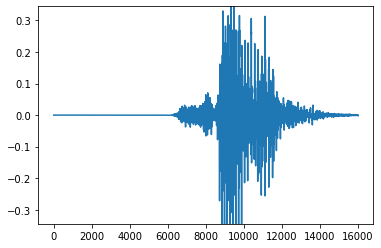

In [ ]:
tensor = tf.cast(audio_tensor, tf.float32) / 2**16

fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylim((-1*np.max(tensor), np.max(tensor)))
_ = ax.plot(tensor)

# y축은 진폭(고음이 크게 나느냐, 저음은 낮게), x축은 시간

# 스펙트럼 (Spectrum)  :: 시간의 정보가 없다!!!
 * 특정 주파수 사인파의 진폭 표시
주파수 축의 변화에 따른 진폭 축의 변화
 * 

# 어떤 데이터로 학습을 해야할까?

# 스펙트로그램 (Spectrogram)
 * 시간, 주파수, 볼륨을 모두 한 그래프안에서 볼 수 있다!!!

In [ ]:
def get_spectrogram(values):
    spectrogram = tfio.experimental.audio.spectrogram(tf.convert_to_tensor(values, dtype=tf.float32), 
                                                      nfft=512, window=512, stride=256)
    spectrogram = tf.transpose(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, -1)
    spectrogram = tf.image.flip_up_down(spectrogram)
    
    return spectrogram



# 스펙트로그램 생성

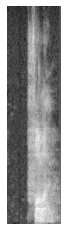

In [ ]:
spectrogram = get_spectrogram(audio_tensor.numpy())
spectrogram = tf.squeeze(spectrogram, -1)

fig = plt.figure()
ax = fig.add_subplot()
ax.axis('off')
_ = ax.imshow(tf.math.log(spectrogram.numpy()), cmap='gray')



# 사인파 들어보기

In [ ]:
volume = 1.0
fs = 16000
duration = 1.0
# f = 261.625
f = 1000     # 소리가 작을수록 저음

samples = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
display(Audio(samples, rate=fs))





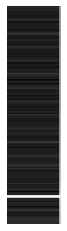

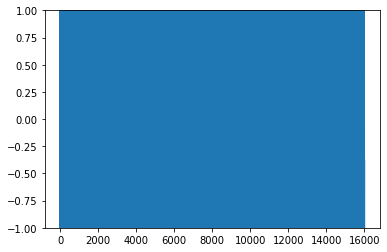

In [ ]:
# Convert to spectrogram
spectrogram = get_spectrogram(samples)
spectrogram = tf.squeeze(spectrogram, -1)

fig = plt.figure()
ax = fig.add_subplot()
ax.axis('off')
_ = ax.imshow(tf.math.log(spectrogram.numpy()), cmap='gray')
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylim((-1*np.max(samples), np.max(samples)))
_ = ax.plot(samples)

# 위 코드에서 f = 10정도로 주면 아래 그림에서 파형이 보임..

# 학습 데이터 전처리 함수 준비
 * 경로에 있는 오디오 데이터를 불러오기
 * 길이 16000으로 고정
   * 모든 데이터의 비트레이트 16000
   * 만약, 다를 경우 리샘플링 필요!
 * 스펙트로그램 생성 (이미지)


In [ ]:
def load_audio(path, label):
    audio = tfio.audio.AudioIOTensor(path, dtype='int16')
    audio_tensor = tf.squeeze(audio.to_tensor(), axis=[-1])
    audio_tensor = tf.pad(tf.expand_dims(audio_tensor, 0), ((0, 0), (0, 16000)), 
                          'constant', constant_values=0)
    audio_tensor = tf.slice(audio_tensor, (0, 0), (1, 16000))
    audio_tensor = tf.squeeze(audio_tensor, axis=0)
    tensor = tf.cast(audio_tensor, tf.float32) / 2**16
    
    spectrogram = get_spectrogram(tensor)
    return spectrogram, label



# 학습 데이터 전처리
 * 현 데이터: 파일 경로, 레이블
 * 처리 후 데이터: 스펙트로그램(이미지), 레이블


In [ ]:
train_dataset_root = tf.data.Dataset.from_tensor_slices((x_train, y_train))
val_dataset_root = tf.data.Dataset.from_tensor_slices((x_test, y_test))


train_dataset = train_dataset_root.map(load_audio)
val_dataset = val_dataset_root.map(load_audio)



# 5. 학습 모델 준비: CNN

# 모델 입력부 처리
 * 한번에 BATCH_SIZE 만큼 학습

In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
val_dataset = val_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)



# 모델 생성
 * 만약 samples 의 길이를 바꾸었다면
1초, 샘플레이트 16000으로 변경


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=get_spectrogram(samples).shape),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(lab2idx))
])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 255, 61, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 30, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 28, 64)       18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 12, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 46080)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

# 모델 컴파일

In [ ]:
history = model.compile(optimizer=tf.keras.optimizers.Adam(),
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])



# 6. 학습

# 학습
 * 오래걸림!
 * CNN이 느린 것이 아님!
  * 데이터 Pipeline이 느린 것
  * 하드디스크에서 파일 불러오기 ⇒ 처리 => … 



In [ ]:
# 하드디스크의 소리자료를 불러와서 스펙토그램으로 만들기 때문에 속도가 느리것임
# CNN 이라서 느린것은 아니다!!

epochs = 1

history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset)



2646/2646 [==============================] - 531s 201ms/step - loss: 1.1249 - sparse_categorical_accuracy: 0.6872 - val_loss: 0.6219 - val_sparse_categorical_accuracy: 0.8216


# Speech Recognition
 * CNN / RNN 을 모두 사용
 * RNN 만 사용하는 것보다 스펙트로그램을 사용하는 것이 좋다는 것이 현 상태
 * Wake up 키워드는 CNN만 사용한다!!

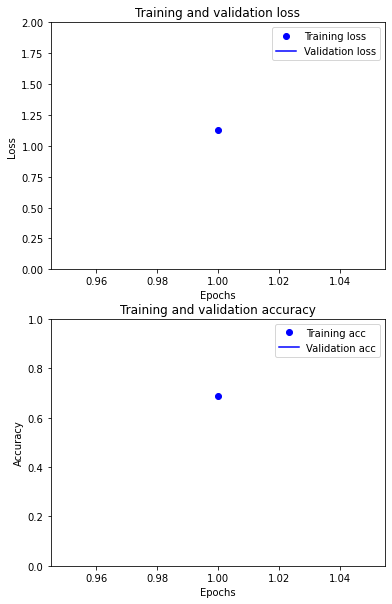

In [ ]:
history_dict = history.history
acc = history_dict['sparse_categorical_accuracy']
val_acc = history_dict['val_sparse_categorical_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

fig1 = plt.figure(figsize=(6, 10))
ax = fig1.add_subplot(2, 1, 1)
ax.plot(epochs, loss, 'bo', label='Training loss')
ax.plot(epochs, val_loss, 'b', label='Validation loss')
ax.set_ylim((0, math.ceil(max(max(loss), max(val_loss)))))
ax.set_title('Training and validation loss', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Loss', fontsize=10)
ax.legend()

ax = fig1.add_subplot(2, 1, 2)
ax.plot(epochs, acc, 'bo', label='Training acc')
ax.plot(epochs, val_acc, 'b', label='Validation acc')
ax.set_ylim((0, math.ceil(max(max(acc), max(val_acc)))))
ax.set_title('Training and validation accuracy', fontsize=12)
ax.set_xlabel('Epochs', fontsize=10)
ax.set_ylabel('Accuracy', fontsize=10)
ax.legend()



# 7. 학습 결과 테스트

# 레이블 종류 확인

In [ ]:
print(f'레이블 종류: ')
for n, label in enumerate(lab2idx, start=1):
    print(label, end=' ')
    if n % 10 == 0:
        print()
print()



레이블 종류: 
eight nine wow down seven off learn happy bird bed 
backward no two three six five house visual sheila four 
stop follow cat one up right dog zero forward left 
tree on marvin go yes 


# 테스트할 레이블 선택

In [ ]:
test_label = 'marvin'  # 위 코드결과값 레이블들 중에서 단어를 입력할 수 있다!
test_idx = lab2idx.index(test_label)

target = list()
for path, label in zip(x_test, y_test):
    label = label[0]
    if label == test_idx:
        target.append((path, label))

choice = random.choice(target)
test_path = choice[0]

audio = tfio.audio.AudioIOTensor(test_path)
audio_tensor = tf.squeeze(audio.to_tensor(), axis=-1)
print(f'Label: {test_label} [{test_idx}]')
display(Audio(audio_tensor.numpy(), rate=audio.rate.numpy()))



Label: marvin [32]


# 테스트 확인
 * 제대로 예측했는지 가지고 놀기!

예측 레이블: marvin


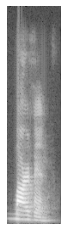

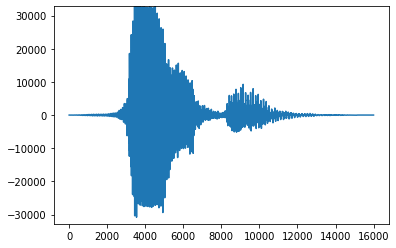

In [ ]:
spectrogram, _ = load_audio(test_path, test_label)
spectrogram_ = tf.squeeze(spectrogram, -1)

fig = plt.figure()
ax = fig.add_subplot()
ax.axis('off')
_ = ax.imshow(tf.math.log(spectrogram_.numpy()), cmap='gray')
fig = plt.figure()
ax = fig.add_subplot()
ax.set_ylim((-1*np.max(audio_tensor.numpy()), np.max(audio_tensor.numpy())))
_ = ax.plot(audio_tensor.numpy())

print(f'예측 레이블: {lab2idx[np.argmax(model.predict(tf.expand_dims(spectrogram, 0)))]}')


여러명이 동시에 말하는 소리는

각각 분리하고

Trim Noise작업도 해야 한다.